In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\User\AppData\Local\Temp/ipykernel_4324/1949089073.py:91: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df['height'] >= df['height'].quantile(0.025)]
C:\Users\User\AppData\Local\Temp/ipykernel_4324/1949089073.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[df['height'] <= df['height'].quantile(0.975)]
C:\Users\User\AppData\Local\Temp/ipykernel_4324/1949089073.py:100: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df4[df['weight'] >= df['weight'].quantile(0.025)]
C:\Users\User\AppData\Local\Temp/ipykernel_4324/1949089073.py:105: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df6 = df5[df['weight'] <= df['weight'].quantile(0.975)]
C:\Users\User\AppData\Local\Temp/ipykernel_4324/1949089073.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

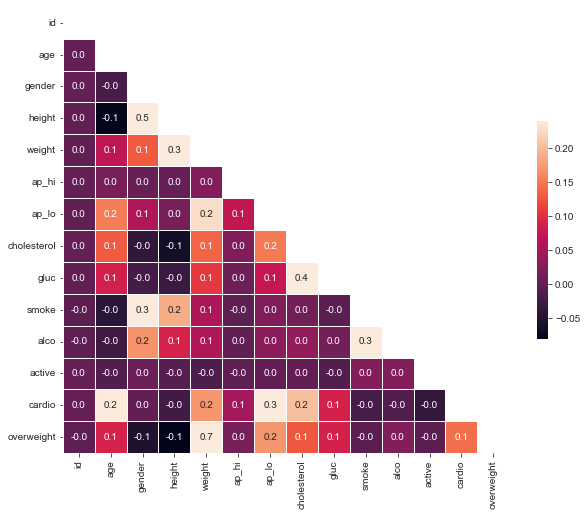

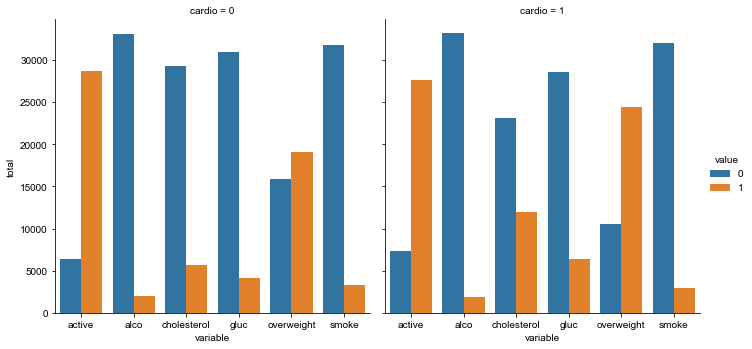

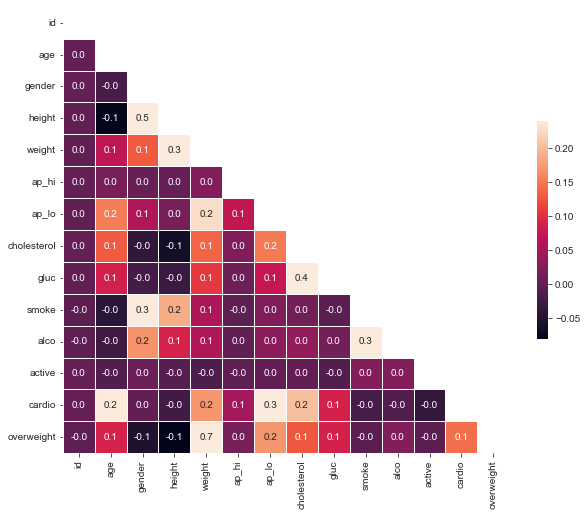

In [3]:
# Import data
df = pd.read_csv('medical_examination.csv')  #exam


# Add 'overweight' column
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = None
df.loc[df['BMI'] > 25, 'overweight'] = int(1)
df.loc[df['BMI'] <= 25, 'overweight'] = int(0)



# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1
#print(df.head())

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` 
    # using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
                # my version

    


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature
    df_cat.sort_values(['cardio', 'variable'], inplace=True)

    #print(df_cat.head())
    

    #df_cat_0 = df_cat[df_cat['cardio'] == 0]
    #df_cat_1 = df_cat[df_cat['cardio'] == 1]
    #print(df_cat_0.head())  # testin
    #print(df_cat_1.head())  # testin
    #  You will have to rename one of the columns for the catplot to work correctly.
    #df_cat = None

    # Draw the catplot with 'sns.catplot()'
    
    #g = sns.FacetGrid(df_cat, col='cardio', hue='value', height=7, aspect=1)
    #g.map(sns.countplot, 'variable')
    
    
    #g = sns.catplot(x='variable', hue='value', col='cardio', data = df_cat, kind='count', height=5, aspect=1,
    #               y='total' )
    

    #g.add_legend()
    # choose the colour
    #g.set_xlabels('variable')
    #g.set_ylabels('total')
    
    #fig, ax = plt.subplots(1,2)
    ##sns.countplot(data=df_cat_0, x='variable', hue='value', ax=ax[0])
    #sns.countplot(data=df_cat_1, x='variable', hue='value', ax=ax[1])
    #plt.show()
    
    
    g = sns.catplot(x='variable', hue='value',    #my version
            col='cardio', data = df_cat, kind='count', height=5, aspect=1)
    
    sns.set_style('ticks')
    g.set_ylabels('total')
    fig = g.fig

    
                   
    
    # Do not modify the next two lines

    fig.savefig('catplot.png')
    return fig




#Filter out the following patient segments that represent incorrect data:
#print(df.info())

#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
df2 = df.drop(df[df.ap_lo > df.ap_hi].index)
#print(df.info())

# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
df3 = df2[df['height'] >= df['height'].quantile(0.025)]
#print(df.info())

# height is more than the 97.5th percentile
df4 = df3[df['height'] <= df['height'].quantile(0.975)]
#df = df.drop(df[df.height > df.height.quantile(0.975)].index)  #first version
#print(df.info())

# weight is less than the 2.5th percentile
df5 = df4[df['weight'] >= df['weight'].quantile(0.025)]
#print(df.info())

# weight is more than the 97.5th percentile
#df = df.drop(df[df.weight > df.weight.quantile(0.975)].index)  #first version
df6 = df5[df['weight'] <= df['weight'].quantile(0.975)]

df6['overweight'] = pd.to_numeric(df6['overweight'])
#print(df.info())
# now you have to include only overweight column and exlude BMI
#print(df.head())
#df2 = df.filter(['id', 'age',  'gender',  'height',  'weight',  'ap_hi',  'ap_lo',  'cholesterol',  'gluc',  'smoke',  
    #    'alco',  'active',  'cardio', 'overweight'], axis=1)
#df.drop(['BMI'], axis=1, inplace=True)   #overweight is missing from HEATMAP
#print(df2.head())
#print(df.columns.get_loc('overweight'))


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    
    df_heat = df6[['id', 'age',  'gender',  'height',  'weight',  'ap_hi',  'ap_lo',  'cholesterol',  'gluc',  'smoke',  
        'alco',  'active',  'cardio', 'overweight']]
    #print(corr)   # testin])
    #print(df_heat.head())
    # Calculate the correlation matrix
    corr = df_heat.corr()
    #print(corr)   # testin
    corr.add(df_heat['overweight'])
    #print(corr.index)
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr))

    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10,10))
    
    

    
    # Draw the heatmap with 'sns.heatmap()'
    dataplot = sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=.5, square=True, 
                cbar_kws={"shrink": .4},  vmin=-0.08, vmax=0.24)
    sns.color_palette("magma", as_cmap=True)
    #plt.show()


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_cat_plot()  #testin
draw_heat_map()  #testin

